<a href="https://colab.research.google.com/github/LLewis/ai-deep-learning/blob/main/Lewis_Build_Train_ANN_with_Perceptron_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN with Perceptron Model Challenge +
My Mission Challenge

In [219]:
#import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


<ipython-input-219-9e90e43287bd>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [220]:
from re import X
#Step 1 build
def createData(m):  #m is the slope
  N = 50
  x = torch.randn(N,1)
  y = m*x + torch.randn(N,1)/2

  #plt.plot(x,y, 's')
  #plt.show()

  return x, y

In [221]:
#Step 2 build the model
def buildAndTrainModel(x,y):

  ANNreg = nn.Sequential(
      nn.Linear(1,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )

  #Loss and Optimizer functions
  learningRate = .05
  #Mean Square Error MSE function
  lossfun = nn.MSELoss()
  #optimizer (the flavor of stacastic gradient descent to implememt)
  optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)


  #Step 3 train model
  numepochs = 500
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):
     # 1. forward pass
     yHat = ANNreg(x)

     #2. compute the loss
     loss = lossfun(yHat, y)
     losses[epochi] = loss

     # 3. backpropagation
     optimizer.zero_grad()
     loss.backward()
     optimizer.step()
     #end training loop

  #compute model final predictions
  predictions = ANNreg(x)

  #Output
  return predictions, losses



Test Code once

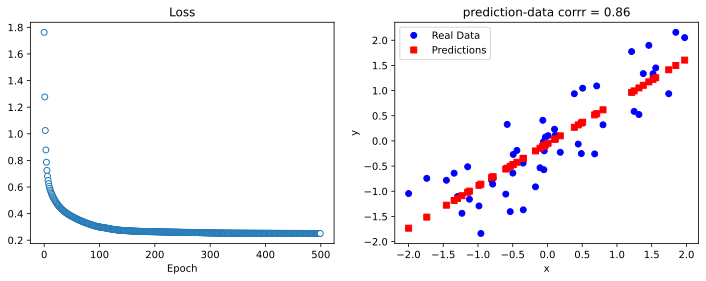

In [223]:
#from IPython.core.pylabtools import figsize
#Execute Program

#Create a dataset of x and y pairs and passing into the function a slope of .08
x, y =createData(.8)

#Run the Model
yHat, losses = buildAndTrainModel(x, y)

fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')


ax[1].plot(x, y, 'bo',label='Real Data')
ax[1].plot(x, yHat.detach(), 'rs', label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corrr = {np.corrcoef(y.T, yHat.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()

Now for the Experiment Lewis

In [226]:
#Implement 21 slopes and 50 epochs/experiments

#the slope to simulate, like the parameter m in previous example
slopes = np.linspace(-2,2,21)

numExps = 50

#initialize output matrix
results = np.zeros((len(slopes), numExps, 2))

#loop through slopes for each experiment
for slopei in range(len(slopes)):
  for N in range(numExps):

    #create a dataset and run the model
    x,y = createData(slopes[slopei])
    yHat,losses = buildAndTrainModel(x,y)

    #store the final loss and performance
    results[slopei, N,0] = losses[-1]
    results[slopei, N,1] = np.corrcoef(y.T, yHat.detach().T)[0,1]


#Correlation can be 0 (zero) if the model did'nt do well. Set nan's->0
results[np.isnan(results)] = 0

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


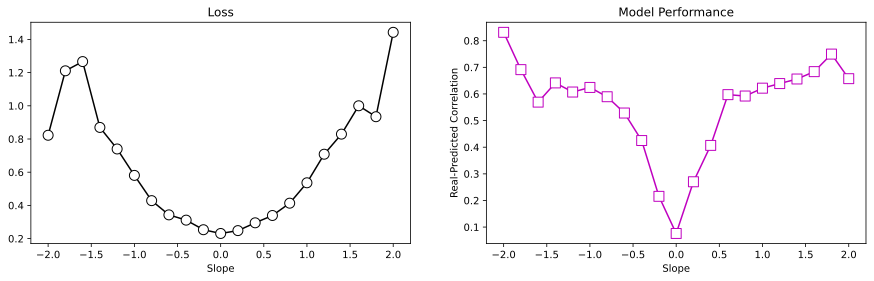

In [233]:
#Plot the results
fig,ax = plt.subplots(1,2,figsize=(15,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1), 'ko-', markerfacecolor='w', markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-', markerfacecolor='w', markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-Predicted Correlation')
ax[1].set_title('Model Performance')

plt.show()
